In [152]:
import numpy as np
import matplotlib.pyplot as plt

In [153]:
#np.random.seed(0)
mensagem = np.random.randint(0,2, 100)
#randint(low, high=None, size =None, dtype = int)
#Return random integers from 'low' (inclusive) to 'high'(exclusive).

In [154]:
mensagem

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1])

In [155]:
Tb = 10 #numero de pontos por cada bit
A = 2
Sinal0 = np.zeros(Tb) # sinal para o 0
Sinal1 = A*np.ones(Tb) # sinal para o 1

In [214]:
sinal = np.zeros(len(mensagem)*Tb) #array onde vamos guardar o sinal a enviar
indices = np.arange(len(mensagem))
#Ciclo for otimizado
for i in indices[mensagem == 1]:
    sinal[i*Tb:(i+1)*Tb] = Sinal1

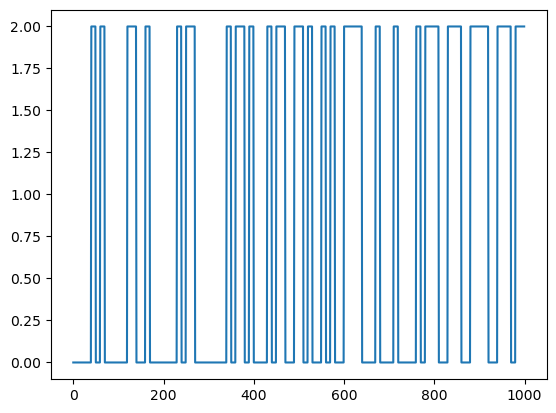

In [216]:
plt.plot(sinal)

In [218]:
sinal.shape

(1000,)

# Canal de Comunicação

## Gerar ruido que segue uma distribuição Gaussiana

In [221]:
ruido = 0.3 * np.random.randn(len(sinal))

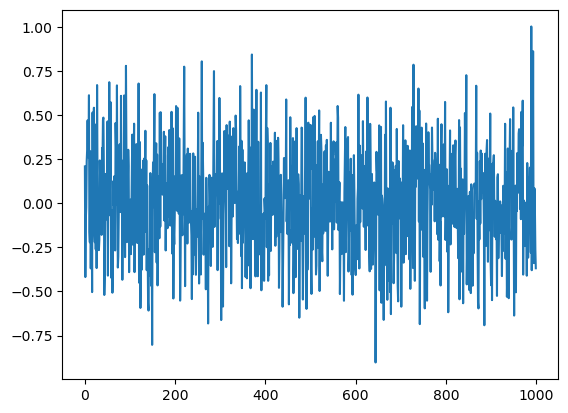

In [223]:
plt.plot(ruido)

In [225]:
np.mean(ruido)

0.014926739431487797

In [227]:
np.std(ruido)

0.2980879318258009

(array([ 1.,  0.,  1.,  0.,  0.,  3.,  4.,  4., 11., 14., 16., 15., 20.,
        25., 22., 18., 35., 31., 34., 43., 48., 53., 48., 46., 45., 48.,
        51., 54., 43., 43., 35., 31., 31., 19., 25., 21., 12., 15.,  7.,
         9.,  3.,  7.,  1.,  1.,  4.,  1.,  1.,  0.,  0.,  1.]),
 array([-0.90233196, -0.86425817, -0.82618438, -0.78811058, -0.75003679,
        -0.71196299, -0.6738892 , -0.63581541, -0.59774161, -0.55966782,
        -0.52159402, -0.48352023, -0.44544644, -0.40737264, -0.36929885,
        -0.33122505, -0.29315126, -0.25507747, -0.21700367, -0.17892988,
        -0.14085609, -0.10278229, -0.0647085 , -0.0266347 ,  0.01143909,
         0.04951288,  0.08758668,  0.12566047,  0.16373427,  0.20180806,
         0.23988185,  0.27795565,  0.31602944,  0.35410324,  0.39217703,
         0.43025082,  0.46832462,  0.50639841,  0.54447221,  0.582546  ,
         0.62061979,  0.65869359,  0.69676738,  0.73484118,  0.77291497,
         0.81098876,  0.84906256,  0.88713635,  0.92521015,

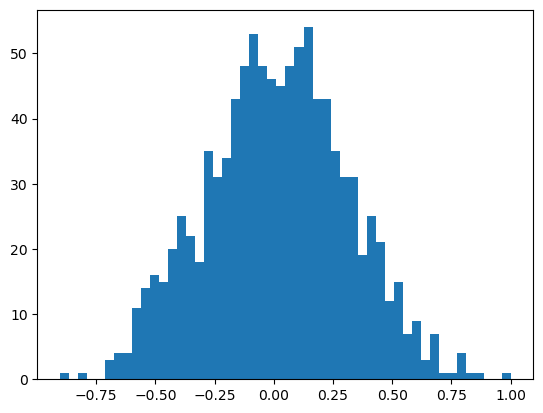

In [229]:
plt.hist(ruido, bins = 50)

In [231]:
y = sinal + ruido

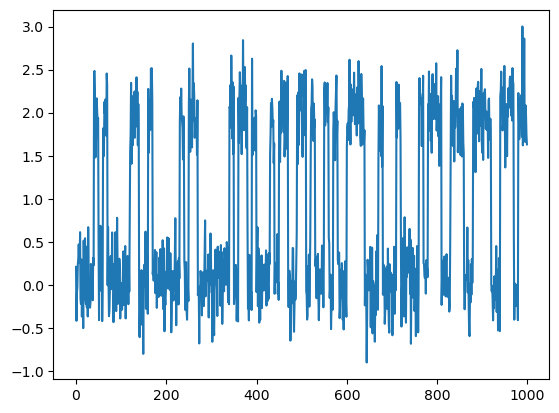

In [233]:
plt.plot(y)

# Emissor versão 0
## Fazer a média a cada Tb pontos

In [236]:
decisoes = np.zeros(len(mensagem))
for indice in range(0, len(y), Tb):
    m = np.mean(y[indice : indice + Tb])
    if m > A/2:
        decisoes[int(indice/Tb)] = 1

In [244]:
decisoes 

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.])